In [2]:

import numpy as np
import datetime
import glob
import os
import matplotlib.pyplot as plt
import cartopy
from matplotlib import gridspec
import itertools
import cartopy.crs as ccrs
import tqdm
import netCDF4 as nc 
from scipy.stats import linregress
import warnings
import pickle
warnings.filterwarnings("ignore")


In [3]:
# Load inverse SIT CS_IS_2p_LARM

inverseCSIS20182019 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201811/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                    '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201812/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                    '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201901/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                    '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201902/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                    '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201903/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                    '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201904/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy']

inverseCSIS20192020 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201911/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201912/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202001/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202002/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202003/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202004/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy']

inverseCSIS20202021 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202011/15tesselationDelaunay_initcell800_iteration2000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202012/15tesselationDelaunay_initcell800_iteration2000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202101/15tesselationDelaunay_initcell800_iteration2000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202102/15tesselationDelaunay_initcell800_iteration2000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202103/15tesselationDelaunay_initcell800_iteration2000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202104/15tesselationDelaunay_initcell800_iteration2000000_date_window5j_error0.01_ice.npy']

inverse_CSIS = [inverseCSIS20182019, inverseCSIS20192020, inverseCSIS20202021]


inverseCSAK20182019 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201811/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201812/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201901/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201902/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201903/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201904/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy']

inverseCSAK20192020 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201911/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201912/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202001/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202002/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202003/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202004/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy']

inverseCSAK20202021 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202011/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202012/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202101/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202102/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202103/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202104/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy']

inverse_CSAK = [inverseCSAK20182019, inverseCSAK20192020, inverseCSAK20202021]

In [4]:
# Données masqués pour comparer CS_IS et CS_AK
inverse_sit_CSIS_mask = []

for i in range(len(inverse_CSIS)):
    for j in range(len(inverseCSIS20182019)):
        ak = np.load(inverse_CSAK[i][j])
        csis = np.load(inverse_CSIS[i][j])

        csis = mask_observations(ak, csis)

        inverse_sit_CSIS_mask.append(np.nanmean(csis))

NameError: name 'mask_observations' is not defined

In [ ]:
# Données Awismos

awismos_20182019 = ['/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2018/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201811-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2018/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201812-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201901-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201902-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201903-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201904-fv2p4.nc']

awismos_20192020 = ['/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201911-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201912-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202001-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202002-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202003-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202004-fv2p4.nc']

awismos_20202021 = ['/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202011-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202012-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2021/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202101-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2021/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202102-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2021/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202103-fv2p4.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/awismos/data_awismos_l3c_month/2021/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202104-fv2p4.nc']

awismos= [awismos_20182019, awismos_20192020, awismos_20202021]

awismos_sit = []

for i in range(len(awismos)):
    for j in range(len(awismos_20182019)):
        sit = nc.Dataset(awismos[i][j]).variables['sea_ice_thickness'][0][36:396,36:396][::-1, :]

        awismos_sit.append(np.nanmean(sit))
    


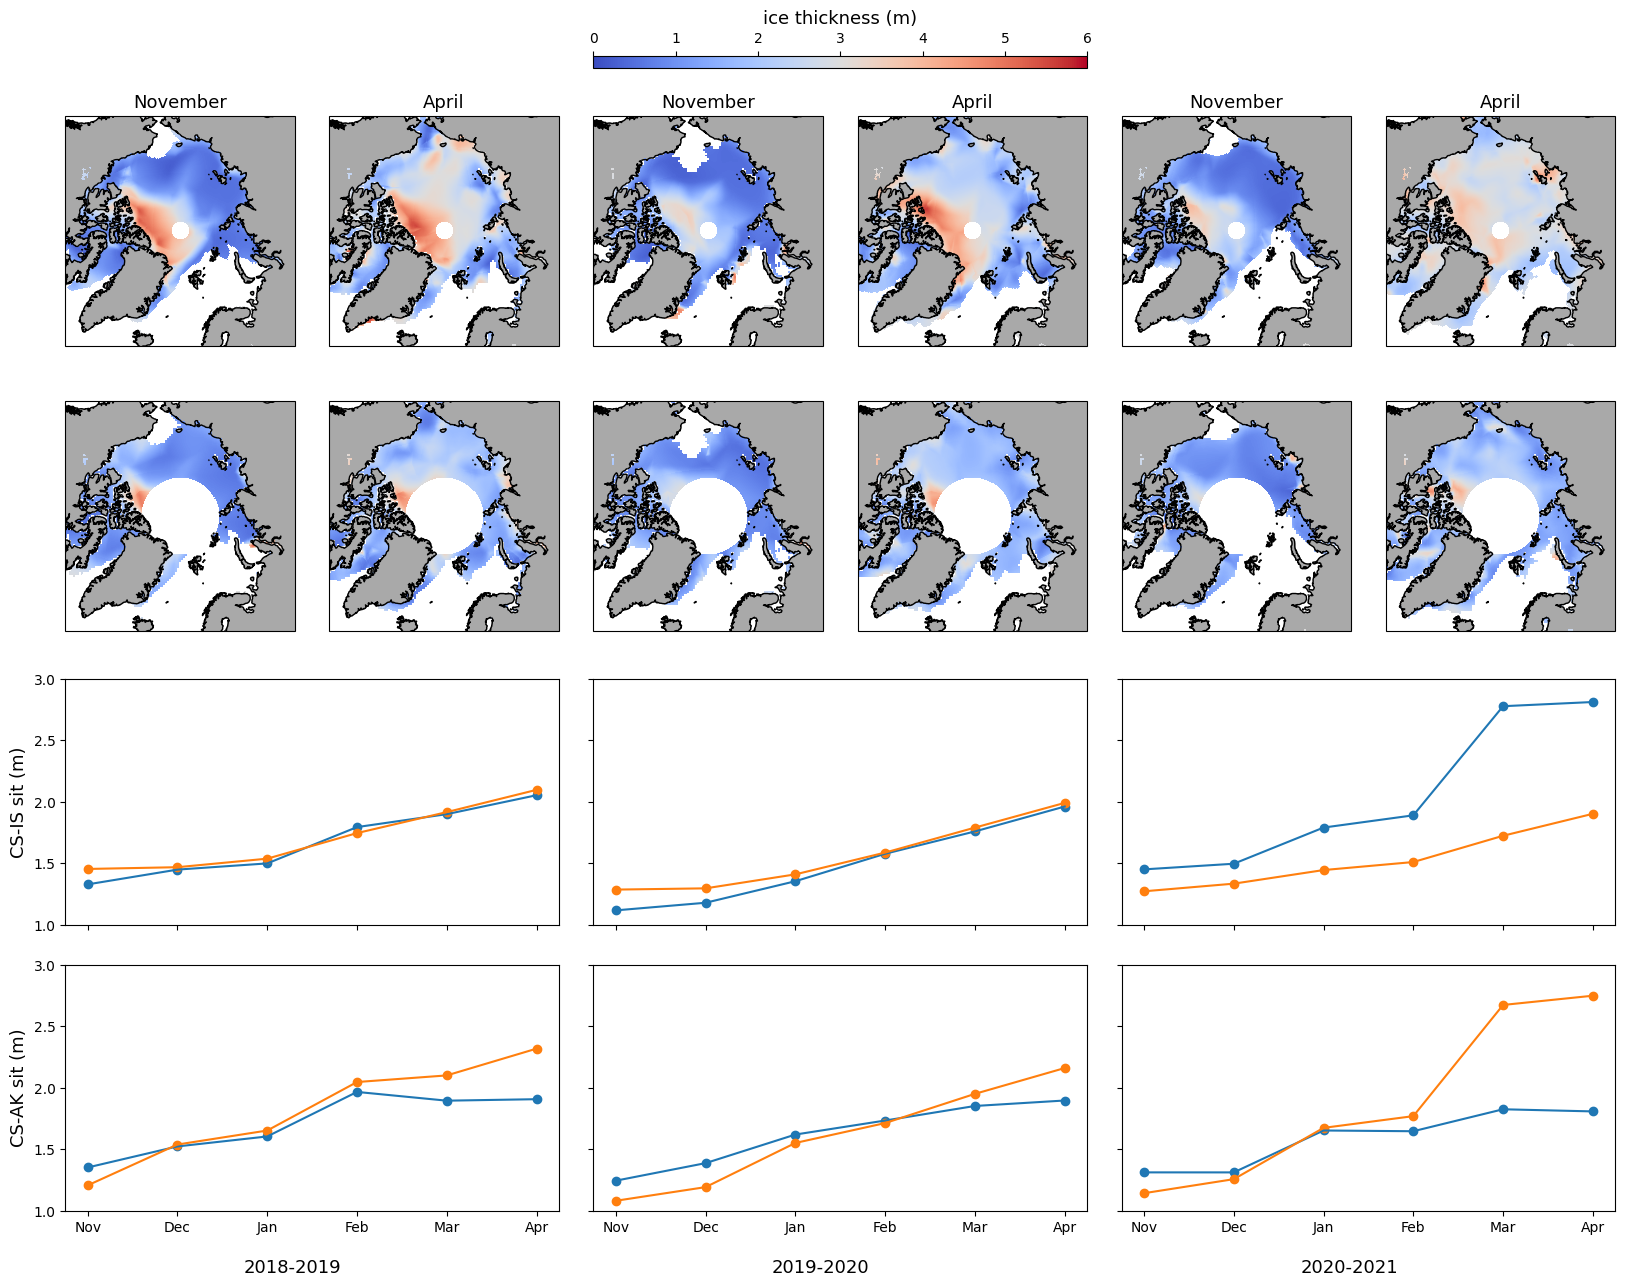

In [ ]:
fig = plt.figure(figsize=(20,15))
spec = gridspec.GridSpec(ncols=6, nrows=5, hspace=0.2, wspace=0.15, height_ratios=[0.05,1,1, 1, 1])


months = ["November", "April", "November", "April", "November", "April"]
date = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")


inverse_map_CSIS = [np.load(inverseCSIS20182019[0]), np.load(inverseCSIS20182019[5]), np.load(inverseCSIS20192020[0]), 
                    np.load(inverseCSIS20192020[5]), np.load(inverseCSIS20202021[0]), np.load(inverseCSIS20202021[5])]


inverse_map_CSAK = [np.load(inverseCSAK20182019[0]), np.load(inverseCSAK20182019[5]), np.load(inverseCSAK20192020[0]), 
                    np.load(inverseCSAK20192020[5]), np.load(inverseCSAK20202021[0]), np.load(inverseCSAK20202021[5])]


for count, month in enumerate(months):
    ax = fig.add_subplot(spec[count + 6],projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.coastlines()  
    ax.set_title(month, fontsize=13) 
    p_map = ax.pcolormesh(lon_g,lat_g,inverse_map_CSIS[count],cmap='coolwarm',vmin=0,vmax=6,
                          transform=ccrs.PlateCarree())  

for count in range(0, 6):
    ax = fig.add_subplot(spec[count + 12],projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.coastlines()  
    #ax.set_title(month, fontsize=13) 
    p_map = ax.pcolormesh(lon_g,lat_g,inverse_map_CSAK[count],cmap='coolwarm',vmin=0,vmax=6,
                          transform=ccrs.PlateCarree())  


cax = fig.add_subplot(spec[2:4])
fig.colorbar(p_map, cax =cax, orientation = "horizontal",fraction=.1)
cax.set_title('ice thickness (m)', fontsize = 13)
cax.xaxis.set_ticks_position('top')
#cax.xaxis.set_label_position('top')

ax = fig.add_subplot(spec[18:20])
ax.scatter(date, inverse_sit_CSIS[:6], cmap = 'green')
ax.plot(date, inverse_sit_CSIS[:6])
ax.scatter(date, awismos_sit[:6])
ax.plot(date, awismos_sit[:6])
#ax.grid(which = 'both')
ax.set_ylabel('CS-IS sit (m)', fontsize = 13)
ax.xaxis.set_ticklabels([])
ax.set_yticks([1,1.5,2,2.5,3])
ax.set_ylim(1, 3)
ax = fig.add_subplot(spec[20:22])
ax.scatter(date, inverse_sit_CSIS[6:12])
ax.plot(date, inverse_sit_CSIS[6:12])
ax.scatter(date, awismos_sit[6:12])
ax.plot(date, awismos_sit[6:12])
ax.yaxis.set_ticklabels([])
ax.xaxis.set_ticklabels([])
#ax.grid(which = 'both')
ax.set_ylim(1, 3)
ax.set_yticks([1,1.5,2,2.5,3])
ax = fig.add_subplot(spec[22:24])
ax.scatter(date, inverse_sit_CSIS[12:18])
ax.plot(date, inverse_sit_CSIS[12:18])
ax.scatter(date, awismos_sit[12:18])
ax.plot(date, awismos_sit[12:18])
ax.yaxis.set_ticklabels([])
ax.xaxis.set_ticklabels([])
#ax.grid(which = 'both')
ax.set_ylim(1, 3)
ax.set_yticks([1,1.5,2,2.5,3])


ax = fig.add_subplot(spec[24:26])
ax.scatter(date, inverse_sit_CSAK[:6])
ax.plot(date, inverse_sit_CSAK[:6])
ax.scatter(date, inverse_sit_CSIS_mask[:6])
ax.plot(date, inverse_sit_CSIS_mask[:6])
#ax.scatter(date, awismos_sit[:6])
#ax.plot(date, awismos_sit[:6])
ax.set_ylabel('CS-AK sit (m)', fontsize = 13)
ax.set_ylim(1, 3)
ax.text(1.74, 0.5,'2018-2019', fontsize = 13)
ax.set_yticks([1,1.5,2,2.5,3])
ax = fig.add_subplot(spec[26:28])
ax.scatter(date, inverse_sit_CSAK[6:12])
ax.plot(date, inverse_sit_CSAK[6:12])
ax.scatter(date, inverse_sit_CSIS_mask[6:12])
ax.plot(date, inverse_sit_CSIS_mask[6:12])
#ax.scatter(date, awismos_sit[6:12])
#ax.plot(date, awismos_sit[6:12])
ax.yaxis.set_ticklabels([])
ax.set_ylim(1, 3)
ax.text(1.74, 0.5,'2019-2020', fontsize = 13)
ax.set_yticks([1,1.5,2,2.5,3])
ax = fig.add_subplot(spec[28:30])
ax.scatter(date, inverse_sit_CSAK[12:18])
ax.plot(date, inverse_sit_CSAK[12:18])
ax.scatter(date, inverse_sit_CSIS_mask[12:18])
ax.plot(date, inverse_sit_CSIS_mask[12:18])
#ax.scatter(date, awismos_sit[12:18])
#ax.plot(date, awismos_sit[12:18])
ax.yaxis.set_ticklabels([])
ax.set_ylim(1, 3)
ax.text(1.74, 0.5,'2020-2021', fontsize = 13)
ax.set_yticks([1,1.5,2,2.5,3])




In [ ]:
## Figure d'erreurs

AKCPOM_20182019 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/error_map/2018-2019/AKCPOM_Period_15j.npy')
AKCPOM_20192020 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/error_map/2019-2020/AKCPOM_Period_15j.npy')
AKCPOM_20202021 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/error_map/2020-2021/AKCPOM_Period_15j.npy')

CS2CPOM_20182019 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2018-2019/CS2CPOM_Period_15j.npy')
CS2CPOM_20192020 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2019-2020/CS2CPOM_Period_15j.npy')
CS2CPOM_20202021 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2020-2021/CS2CPOM_Period_15j.npy')

AKLARM_20182019 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/error_map/2018-2019/AK_Period_15j.npy')
AKLARM_20192020 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/error_map/2019-2020/AK_Period_15j.npy')
AKLARM_20202021 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/error_map/2020-2021/AK_Period_15j.npy')

CS2LARM_20182019 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2018-2019/CS2_Period_15j.npy')
CS2LARM_20192020 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2019-2020/CS2_Period_15j.npy')
CS2LARM_20202021 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2020-2021/CS2_Period_15j.npy')

IS2_20182019 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2018-2019/IS2_Period_15j.npy')
IS2_20192020 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2019-2020/IS2_Period_15j.npy')
IS2_20192021 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2020-2021/IS2_Period_15j.npy')


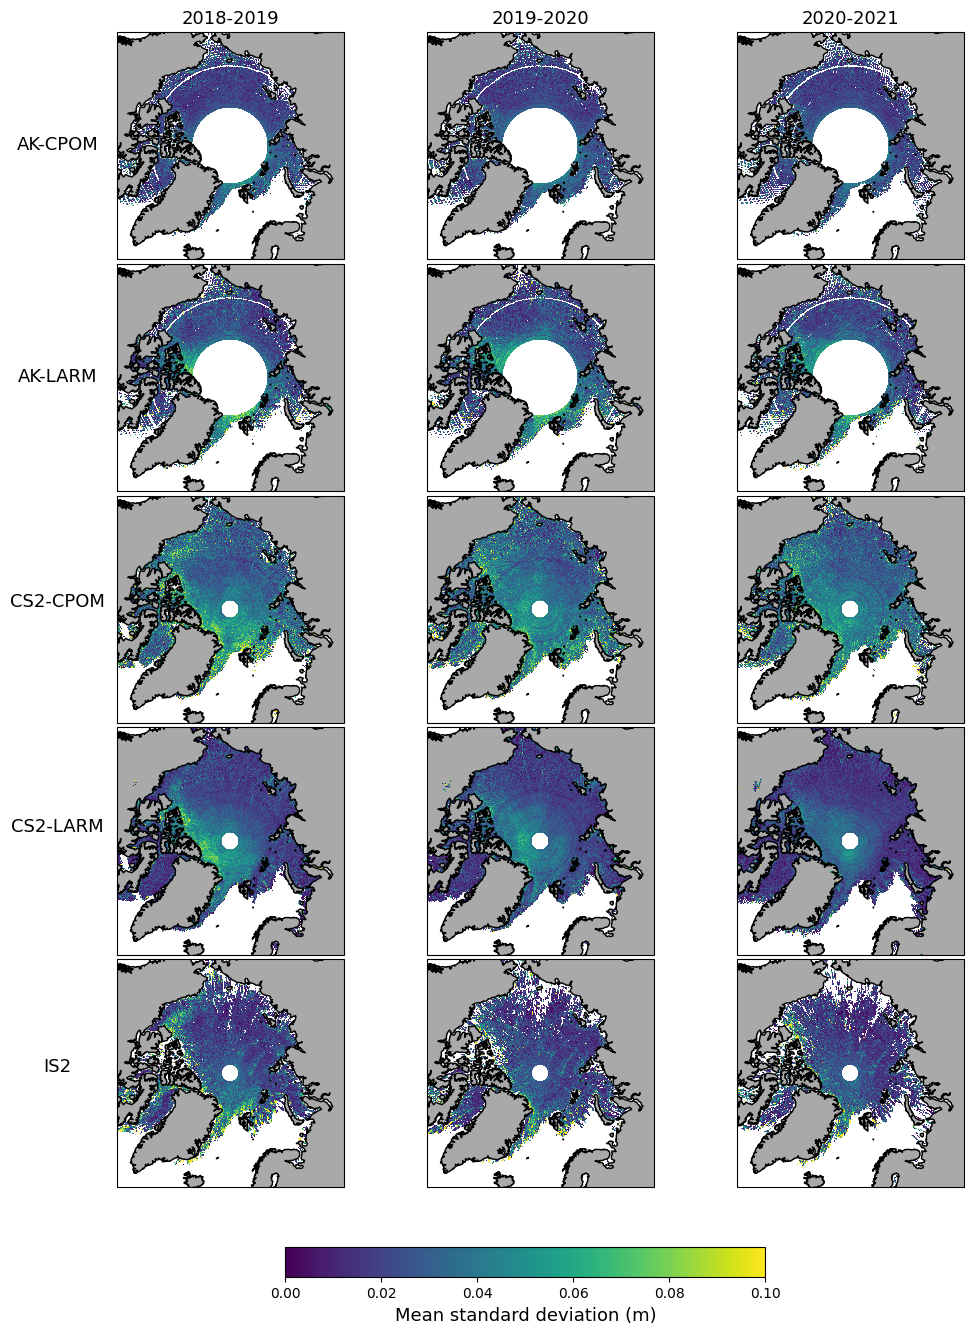

In [ ]:
fig = plt.figure(figsize=(12,15))
spec = gridspec.GridSpec(ncols=3, nrows=5, hspace=0.02, wspace=0.0015)

lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")


AK = [AKCPOM_20182019, AKCPOM_20192020, AKCPOM_20202021, AKLARM_20182019, AKLARM_20192020, AKLARM_20202021]
CS2 = [CS2CPOM_20182019, CS2CPOM_20192020, CS2CPOM_20202021, CS2LARM_20182019, CS2LARM_20192020, CS2LARM_20202021]
IS2 = [IS2_20182019, IS2_20192020, IS2_20192021]
years = ['2018-2019', '2019-2020','2020-2021']
data_type = ["AK-CPOM", "AK-LARM", "CS2-CPOM", "CS2-LARM", "IS2"]

for count in range(6):
    ax = fig.add_subplot(spec[count],projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.coastlines()  
    p_map = ax.pcolormesh(lon_g,lat_g,AK[count],cmap='viridis',vmin = 0, vmax = 0.25,
                          transform=ccrs.PlateCarree()) 
    if count < 3:
        ax.set_title(years[count], fontsize = 13)


for count in range(0, 6):
    ax = fig.add_subplot(spec[count + 6],projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.coastlines()  
    p_map = ax.pcolormesh(lon_g,lat_g,CS2[count],cmap='viridis',vmin = 0, vmax = 0.1,
                          transform=ccrs.PlateCarree())  

for count in range(3): 
    ax = fig.add_subplot(spec[count + 12],projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.coastlines()  
    p_map = ax.pcolormesh(lon_g,lat_g,IS2[count],cmap='viridis',vmin = 0, vmax = 0.1,
                          transform=ccrs.PlateCarree())  



cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
cbar = fig.colorbar(p_map, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Mean standard deviation (m)', fontsize = 13)  




fig.text(0.11, 0.805, data_type[0], va='center', ha='center', fontsize=13)
fig.text(0.11, 0.6505, data_type[1], va='center', ha='center', fontsize=13)
fig.text(0.11, 0.5, data_type[2], va='center', ha='center', fontsize=13)
fig.text(0.11, 0.35, data_type[3], va='center', ha='center', fontsize=13)
fig.text(0.11, 0.19, data_type[4], va='center', ha='center', fontsize=13)

save_fig = 1

if save_fig == 1 : 
    plt.savefig('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/validation/maps_error.png', dpi = 300)


In [10]:
## Figure pour comparer les inversions en fonction de la densité de glace utilisée

inversion_MYI = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201811/08tesselationDelaunay_initcell1500_iteration1500000_date_window15j_errorinput_alphacs20.75_hierarchicalno_ice.npy')
inversion_FYI = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201811/08tesselationDelaunay_initcell1500_iteration1500000_date_window15j_errorinput_alphacs20.75_hierarchicalno_ice.npy')
inversion_Mixte = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201811/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy')

inversion = [inversion_FYI, inversion_Mixte, inversion_MYI]

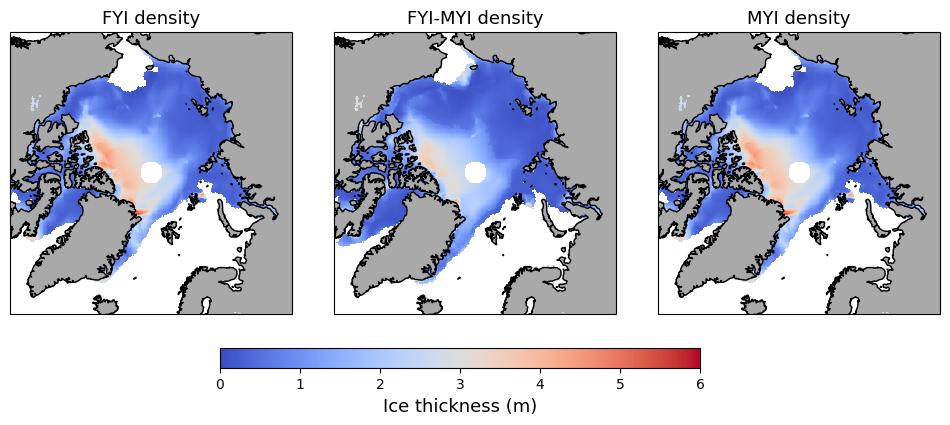

In [22]:
fig = plt.figure(figsize=(12,10))
spec = gridspec.GridSpec(ncols=3, nrows=1, hspace=0.02, wspace=0.15)

lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")

ice_density = ['FYI density', 'FYI-MYI density', 'MYI density']

for i, density_type in enumerate(ice_density):
    ax = fig.add_subplot(spec[i],projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.coastlines()  
    p_map = ax.pcolormesh(lon_g,lat_g,inversion[i],cmap='coolwarm',vmin = 0, vmax = 6,
                          transform=ccrs.PlateCarree()) 
    ax.set_title(ice_density[i], fontsize = 13)
    

    
cbar_ax = fig.add_axes([0.3, 0.3, 0.4, 0.02])
cbar = fig.colorbar(p_map, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Ice thickness (m)', fontsize = 13)  


